# **Question 3**

## Libraries Import and Data Loading

In [28]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Define the path to your CSV file (49 industries named as )
file_path = '49Industries_totalreturn.CSV'
import io

# Read the CSV up to the first blank row after the header
with open(file_path, 'r') as file:
    lines = []
    skip_rows = 11  # Adjust to skip initial lines if necessary
    for i, line in enumerate(file):
        # Skip initial lines if specified
        if i < skip_rows:
            continue
        # Stop reading on first blank line (end of first table)
        if not line.strip():
            break
        lines.append(line)

# Use pandas to read these lines as if they were a CSV
# Set the header row (adjust index as needed)
first_table_data = pd.read_csv(io.StringIO(''.join(lines)), header=0)

# Display the data to verify
print(first_table_data.head())

   Unnamed: 0  Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  \
0      192607   2.37   0.12 -99.99  -5.19   1.29   8.65   2.50  50.21  -0.48   
1      192608   2.23   2.68 -99.99  27.03   6.50  16.81  -0.76  42.98  -3.58   
2      192609  -0.57   1.58 -99.99   4.02   1.26   8.33   6.42  -4.91   0.73   
3      192610  -0.46  -3.68 -99.99  -3.31   1.06  -1.40  -5.09   5.37  -4.68   
4      192611   6.75   6.26 -99.99   7.29   4.55   0.00   1.82  -6.40  -0.54   

   ...  Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  RlEst  Fin    Other  
0  ...   7.70   1.92 -23.79   0.07   1.87   4.61  -0.54   2.89  -5.77   5.20  
1  ...  -2.38   4.85   5.39  -0.75  -0.13  11.83   2.57   5.30   0.32   6.76  
2  ...  -5.54   0.08  -7.87   0.25  -0.56  -1.75   0.72  -3.06  -4.81  -3.86  
3  ...  -5.08  -2.62 -15.38  -2.20  -4.11 -11.82  -4.28  -5.74  -0.94  -8.49  
4  ...   3.84   1.61   4.67   6.52   4.33  -2.97   3.58   2.21   5.13   4.00  

[5 rows x 50 columns]


## Data Manipulation & Cleaning

In [29]:
# Replace all the missing values with NaN
first_table_data.replace(-99.99 or -999, np.nan, inplace=True)
first_table_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
# Changing all the percentage data back to decimals for analysis
first_table_data.iloc[:, 1:] = first_table_data.iloc[:, 1:] / 100
first_table_data.head()

,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,192607,0.0237,0.0012,NaN,-0.0519,0.0129,0.0865,0.0250,0.5021,-0.0048,...,0.0770,0.0192,-0.2379,0.0007,0.0187,0.0461,-0.0054,0.0289,-0.0577,0.0520
1,192608,0.0223,0.0268,NaN,0.2703,0.0650,0.1681,-0.0076,0.4298,-0.0358,...,-0.0238,0.0485,0.0539,-0.0075,-0.0013,0.1183,0.0257,0.0530,0.0032,0.0676
2,192609,-0.0057,0.0158,NaN,0.0402,0.0126,0.0833,0.0642,-0.0491,0.0073,...,-0.0554,0.0008,-0.0787,0.0025,-0.0056,-0.0175,0.0072,-0.0306,-0.0481,-0.0386
3,192610,-0.0046,-0.0368,NaN,-0.0331,0.0106,-0.0140,-0.0509,0.0537,-0.0468,...,-0.0508,-0.0262,-0.1538,-0.0220,-0.0411,-0.1182,-0.0428,-0.0574,-0.0094,-0.0849
4,192611,0.0675,0.0626,NaN,0.0729,0.0455,0.0000,0.0182,-0.0640,-0.0054,...,0.0384,0.0161,0.0467,0.0652,0.0433,-0.0297,0.0358,0.0221,0.0513,0.0400


# **Q3) A.**


**A) i. Setting the seed time frame from January 1995 to December 2004**

In [30]:
# Choose the necessary time frame and check data
seed_data = first_table_data[(first_table_data['Date'] >= 199501) & (first_table_data['Date'] <= 200412)]
seed_data.reset_index(drop=True, inplace=True)
seed_data.tail()

,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
115,200408,0.0190,-0.0012,0.0010,0.0188,0.0319,0.0127,-0.0167,0.0028,0.0467,...,0.0010,-0.0087,-0.0248,-0.0081,-0.0258,0.0404,0.0095,0.0666,0.0320,-0.0095
116,200409,0.0298,-0.0067,-0.0406,-0.0793,-0.0248,0.0814,0.0407,0.0110,-0.0288,...,0.0383,0.0306,-0.0003,0.0289,0.0482,-0.0066,0.0133,0.0213,0.0145,0.0193
117,200410,0.0248,0.0342,0.0683,0.0108,0.0284,0.0028,0.0310,0.0255,-0.0359,...,0.0342,0.0693,0.0272,0.0331,0.0296,0.0231,-0.0503,0.0390,0.0482,0.0067
118,200411,0.0050,0.0360,0.0095,-0.0069,0.1741,0.0663,0.0699,0.0188,0.0406,...,0.1053,0.0568,0.0839,0.0247,0.0742,0.0298,0.0810,0.0606,0.0570,0.0306
119,200412,0.0435,0.0544,-0.0073,0.0437,0.0748,0.0482,0.0827,0.0121,0.0412,...,0.0430,0.0418,0.0595,0.0306,0.0512,0.0352,0.0491,0.1315,0.0555,0.0428


In [31]:
# To check if there are any cell containing NaN value
seed_data.isnull().values.any()

False

**A) ii. Building out the covariance matrix**

In [32]:
# Building the Covariance Matrix as there are no Na within our seed period
# Here we skip the first column that is of Date
returns = seed_data.iloc[:, 1:]
cov_matrix = returns.cov()
cov_matrix


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,0.003302,0.000600,0.000387,0.000573,0.000418,0.001208,0.000956,0.000844,0.000482,0.001324,...,0.001324,0.000916,0.000708,0.001046,0.000916,0.000927,0.000722,0.000887,0.001778,0.000504
Food,0.000600,0.001929,0.001527,0.001595,0.001577,0.000897,0.000790,0.000759,0.000962,0.001224,...,0.001156,0.001070,0.000732,0.001016,0.001068,0.001485,0.001548,0.000646,0.001051,0.000663
Soda,0.000387,0.001527,0.007589,0.002968,0.001380,0.001303,0.001656,0.001437,0.001962,0.001721,...,0.001831,0.001902,0.001514,0.001255,0.001195,0.002232,0.001864,0.001354,0.002240,0.001378
Beer,0.000573,0.001595,0.002968,0.003662,0.001202,0.001144,0.001327,0.000838,0.001878,0.001231,...,0.001365,0.001523,0.000837,0.001180,0.001375,0.001830,0.001796,0.000892,0.001722,0.001068
Smoke,0.000418,0.001577,0.001380,0.001202,0.007729,0.001114,0.000873,0.000353,0.000790,0.000608,...,0.001253,0.000422,0.001550,0.000172,0.001015,0.001212,0.001144,0.000937,0.000811,0.001068
Toys,0.001208,0.000897,0.001303,0.001144,0.001114,0.003947,0.002320,0.000978,0.001059,0.002119,...,0.002404,0.001834,0.001047,0.001812,0.001765,0.001503,0.001164,0.001367,0.002525,0.001400
Fun,0.000956,0.000790,0.001656,0.001327,0.000873,0.002320,0.004887,0.001760,0.001097,0.002574,...,0.002788,0.002180,0.002053,0.002309,0.002001,0.002218,0.001531,0.001551,0.003845,0.002431
Books,0.000844,0.000759,0.001437,0.000838,0.000353,0.000978,0.001760,0.002072,0.000829,0.001808,...,0.001787,0.001530,0.001254,0.001807,0.001040,0.001682,0.001426,0.001030,0.002557,0.001432
Hshld,0.000482,0.000962,0.001962,0.001878,0.000790,0.001059,0.001097,0.000829,0.002162,0.000974,...,0.001432,0.001184,0.000703,0.001019,0.001000,0.001389,0.001213,0.000563,0.001555,0.001139
Clths,0.001324,0.001224,0.001721,0.001231,0.000608,0.002119,0.002574,0.001808,0.000974,0.004044,...,0.002813,0.002575,0.001704,0.002614,0.002218,0.002340,0.001996,0.001815,0.003064,0.001930


**A) iii. Minimum Variance Portfolio: Unconstrained (including negative weights - Shorts)**


In [33]:
# Number of industries (assets)
n = len(returns.columns)

# Define weight variable: This is an unknown variable that solver will optimize and creates a "n" dimensional variable
# for the process
weights = cp.Variable(n)

# Define objective (minimize variance)
portfolio_variance = cp.quad_form(weights, cov_matrix)
objective = cp.Minimize(portfolio_variance)

# Constraints: fully invested
constraints = [cp.sum(weights) == 1]

# Solve optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

min_weights_unconstrained = weights.value


# Print results
print("Minimum Variance Portfolio Weights (unconstrained):")
print(min_weights_unconstrained)

Minimum Variance Portfolio Weights (unconstrained):
[ 0.04627885  0.18769057 -0.05869298 -0.02033556  0.00877537 -0.01191305
  0.00060732  0.44168817  0.23027653  0.04925941 -0.04975295  0.2691647
  0.01401752 -0.26821209  0.09001033 -0.01371139 -0.01473738 -0.18937241
  0.05534781  0.02645966 -0.01256868 -0.07843831  0.06967438 -0.19417598
 -0.02873605  0.12987025 -0.01563558  0.06359535 -0.01817007  0.21535218
  0.20304538  0.00495424 -0.13536246 -0.34444481  0.01645449  0.1062553
  0.01023675 -0.02270744  0.21542414 -0.05839574  0.10740772 -0.07029518
  0.02327959  0.12704142 -0.1867899  -0.05035545  0.19952425 -0.04696174
 -0.02192649]


**A) iv. Minimum Variance Portfolio: Constrained (Positive Weights: Long-only)**

In [34]:
# Minimum Variance Portfolio: Constrained
weights_long = cp.Variable(n)

# Define objective (minimize variance)
portfolio_variance_long = cp.quad_form(weights_long, cov_matrix)
objective_long = cp.Minimize(portfolio_variance_long)

# Constraints: fully invested
constraints_long = [weights_long >=0, cp.sum(weights_long) == 1]

# Solve optimization problem
problem_long = cp.Problem(objective_long, constraints_long)
problem_long.solve()

min_weights_constrained = weights_long.value


# Print results
print("Minimum Variance Portfolio of Long-only weights:")
print(min_weights_constrained)


Minimum Variance Portfolio of Long-only weights:
[ 1.12818560e-01  8.94331683e-02  8.59735524e-21  3.26561802e-21
  1.11076314e-20  6.94025337e-21  5.39364910e-22  1.06955046e-01
  1.23220454e-01  5.12833843e-21  2.40759490e-21  6.08433465e-02
  9.18358424e-02  7.30396855e-21 -1.68944105e-21  2.42550608e-21
  6.92295260e-21  2.34944336e-21  6.79912874e-21  3.35169508e-21
  8.68539729e-21  4.08360614e-21 -8.67518013e-21  6.72071879e-21
  1.14739430e-20  9.22894994e-02  6.87114553e-03  4.91974332e-21
  8.46440465e-21  1.21663291e-02  1.66963620e-01  2.60147592e-02
  5.66151476e-21  2.76904566e-21  1.65871984e-20  1.23350719e-20
  2.38841537e-20  6.16843882e-21  8.86214479e-21  1.55322092e-20
  2.61398098e-21  7.38189848e-21  5.59191377e-21  3.75686970e-21
  5.47082176e-21  4.76013221e-21  1.10588229e-01  2.51733010e-21
 -3.22516530e-21]


In [35]:
# epsilon = 1e-10  # Define a small threshold
# rounded_weights = np.round(min_weights_constrained, 6)  # Round to six decimal places
# rounded_weights[rounded_weights < epsilon] = 0
# rounded_weights

**A) v. Inverse Volatility Portfolio Weights**

In [36]:
# Inverse Volatility Portfolio
volatility = returns.std()
weights_inverse = 1/volatility
weights_inverse /= np.sum(weights_inverse)

# Change it to an array
weights_inverse.reset_index(drop=True)
weights_inverse_array = weights_inverse.values
print("Inverse Volatility Portfolio:")
print(weights_inverse_array)


Inverse Volatility Portfolio:
[0.02222129 0.02907317 0.01465717 0.02109895 0.01452356 0.02032462
 0.01826529 0.02805034 0.02746123 0.02007828 0.0177263  0.02850458
 0.02510685 0.02410806 0.02211148 0.02067371 0.02410881 0.01855018
 0.01461823 0.01772885 0.01826057 0.01953055 0.01802023 0.01813243
 0.01935681 0.0171913  0.01002034 0.02005607 0.00999685 0.02513102
 0.0279764  0.02037736 0.02148073 0.02389854 0.01193397 0.0132963
 0.01165467 0.01601064 0.02444983 0.01861411 0.0243701  0.02607215
 0.0227845  0.02462785 0.02246677 0.02448158 0.02697282 0.0159675
 0.01787706]


**A) vi. Table for Comparison & Check of Sum of weights**



In [37]:
Table = {
    'Industries' : first_table_data.columns[1:],
    'Minimum Variance Portfolio (Unconstrained)': np.round(min_weights_unconstrained,6),
    'Minimum Variance Portfolio (Constrained)': np.round(min_weights_constrained,6),
    'Inverse Volatility Portfolio': np.round(weights_inverse_array,6)
}

Table = pd.DataFrame(Table)


# Append a sum of weights across all three categories as a sanity check
Table.loc[len(Table)] = ['Sum of Weights', np.sum(min_weights_unconstrained), np.sum(min_weights_constrained), np.sum(weights_inverse_array)]
Table = {
    'Industries' : first_table_data.columns[1:],
    'Minimum Variance Portfolio (Unconstrained)': min_weights_unconstrained,
    'Minimum Variance Portfolio (Constrained)': min_weights_constrained,
    'Inverse Volatility Portfolio': weights_inverse_array
}

Table = pd.DataFrame(Table)


# Append a sum of weights across all three categories as a sanity check
Table.loc[len(Table)] = ['Sum of Weights', np.sum(min_weights_unconstrained), np.sum(min_weights_constrained), np.sum(weights_inverse_array)]

Table

# Highlight the last row in green colour
Table.style.highlight_max(color='lightgreen', axis=0, subset=pd.IndexSlice[len(Table)-1:, :])



,Industries,Minimum Variance Portfolio (Unconstrained),Minimum Variance Portfolio (Constrained),Inverse Volatility Portfolio
0,Agric,0.046279,0.112819,0.022221
1,Food,0.187691,0.089433,0.029073
2,Soda,-0.058693,0.000000,0.014657
3,Beer,-0.020336,0.000000,0.021099
4,Smoke,0.008775,0.000000,0.014524
5,Toys,-0.011913,0.000000,0.020325
6,Fun,0.000607,0.000000,0.018265
7,Books,0.441688,0.106955,0.028050
8,Hshld,0.230277,0.123220,0.027461
9,Clths,0.049259,0.000000,0.020078


**A) vii. Getting table to Excel to highlight the top 5 weights in green and the bottom 5 weights in red to allow easy comparison**

In [38]:
# Get this table saved into excel file
Table.to_excel('Table.xlsx', index=False)

# **Q3) B.**

**B) i. Annualized In-Sample Volatility for the 3 strategies**

In [39]:
# Building the function for annualized volatility
def annualized_volatility(cov, weights):
  portfolio_volatility = np.sqrt(np.dot(np.transpose(weights), np.dot(cov, weights)))
  annualized_volatility = portfolio_volatility * np.sqrt(12)
  return annualized_volatility

volatility_unconstrained = annualized_volatility(cov_matrix, min_weights_unconstrained)
volatility_constrained = annualized_volatility(cov_matrix, min_weights_constrained)
volatility_inverse_vol = annualized_volatility(cov_matrix, weights_inverse_array)

print("IN-SAMPLE ANNUALIZED VOLATILITY:")
print("\n")
print(f"Unconstrained (Shorts & Long): {round(volatility_unconstrained*100,5)}%")
print(f"Constrained (Long-Only): {round(volatility_constrained*100,5)}%")
print(f"Inverse Volatility: {round(volatility_inverse_vol*100,5)}%")


IN-SAMPLE ANNUALIZED VOLATILITY:


Unconstrained (Shorts & Long): 7.52392%
Constrained (Long-Only): 10.2887%
Inverse Volatility: 13.97532%


# **Q3) C.**

**C) i. Selecting the out-of-sample time frame from January 2005 to July 2023**

In [40]:
out_sample = first_table_data[(first_table_data['Date'] >= 200501) & (first_table_data['Date'] <= 202307)]
print(out_sample.head())
print("\n")
print(out_sample.isnull().values.any())

       Date   Agric   Food    Soda    Beer    Smoke   Toys    Fun     Books  \
942  200501 -0.0281  0.0039  0.0308 -0.0067  0.0436 -0.0218 -0.0507 -0.0330   
943  200502  0.0293 -0.0103 -0.0037  0.0147  0.0312  0.0002 -0.0110 -0.0009   
944  200503  0.0082 -0.0136 -0.0030 -0.0098  0.0031 -0.0644  0.0011 -0.0117   
945  200504 -0.0126 -0.0007  0.0130  0.0222 -0.0134 -0.1148 -0.0388 -0.0301   
946  200505  0.0480  0.0194  0.0387  0.0242  0.0318  0.0328  0.0470 -0.0121   

      Hshld  ...   Boxes   Trans   Whlsl   Rtail   Meals   Banks   Insur  \
942 -0.0125  ... -0.0412 -0.0688 -0.0273 -0.0098  0.0038 -0.0302 -0.0082   
943  0.0002  ...  0.0973  0.0248  0.0312  0.0033  0.0113 -0.0154  0.0259   
944 -0.0059  ... -0.0198 -0.0097 -0.0182  0.0049  0.0029 -0.0317 -0.0434   
945 -0.0257  ... -0.0492 -0.0624 -0.0265 -0.0568 -0.0584  0.0039 -0.0189   
946  0.0169  ...  0.0005  0.0509  0.0426  0.0666  0.0809  0.0250  0.0593   

      RlEst   Fin     Other  
942  0.0220 -0.0049 -0.0061  
943  0.0

**C) ii. Building the covariance matrix for out of sample returns**

In [41]:
# Build a covariance matrix for this
returns_out = out_sample.iloc[:, 1:]
cov_matrix_out = returns_out.cov()
cov_matrix_out

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,0.004577,0.000947,0.001040,0.000798,0.001179,0.001755,0.002549,0.002224,0.000897,0.001632,...,0.001978,0.001905,0.001903,0.001284,0.001369,0.001998,0.001663,0.002660,0.002377,0.001582
Food,0.000947,0.001344,0.001139,0.000974,0.001192,0.001306,0.001442,0.001362,0.001066,0.001203,...,0.001175,0.001167,0.001193,0.000930,0.001016,0.001245,0.001273,0.001638,0.001219,0.001131
Soda,0.001040,0.001139,0.002930,0.001242,0.001305,0.001928,0.002372,0.001916,0.001268,0.001973,...,0.001699,0.001586,0.001647,0.001258,0.001620,0.001754,0.001756,0.003054,0.001799,0.001669
Beer,0.000798,0.000974,0.001242,0.001431,0.001146,0.001079,0.001129,0.001109,0.001117,0.001115,...,0.001075,0.001131,0.001042,0.000903,0.001063,0.001124,0.001115,0.001329,0.001147,0.001156
Smoke,0.001179,0.001192,0.001305,0.001146,0.002792,0.001456,0.001418,0.001474,0.001239,0.001336,...,0.001343,0.001361,0.001258,0.000805,0.001053,0.001488,0.001304,0.001797,0.001343,0.001404
Toys,0.001755,0.001306,0.001928,0.001079,0.001456,0.005571,0.004068,0.003298,0.001619,0.003444,...,0.002676,0.003004,0.002656,0.002389,0.002384,0.003119,0.002529,0.004556,0.003167,0.002175
Fun,0.002549,0.001442,0.002372,0.001129,0.001418,0.004068,0.007409,0.004264,0.001696,0.003954,...,0.003162,0.003520,0.003163,0.002855,0.002852,0.003898,0.003152,0.006063,0.004124,0.002885
Books,0.002224,0.001362,0.001916,0.001109,0.001474,0.003298,0.004264,0.004619,0.001533,0.003137,...,0.002645,0.002965,0.002795,0.002216,0.002183,0.003430,0.002689,0.005023,0.003377,0.002484
Hshld,0.000897,0.001066,0.001268,0.001117,0.001239,0.001619,0.001696,0.001533,0.001619,0.001615,...,0.001404,0.001460,0.001337,0.001102,0.001239,0.001473,0.001354,0.001947,0.001434,0.001365
Clths,0.001632,0.001203,0.001973,0.001115,0.001336,0.003444,0.003954,0.003137,0.001615,0.004310,...,0.002384,0.002778,0.002505,0.002376,0.002307,0.002944,0.002326,0.004378,0.003019,0.002222


**C) iii. Annualized Out-of-Sample volatilities for 3 strategies**

In [42]:
volatility_unconstrained_out = annualized_volatility(cov_matrix_out, min_weights_unconstrained)
volatility_constrained_out = annualized_volatility(cov_matrix_out, min_weights_constrained)
volatility_inverse_vol_out = annualized_volatility(cov_matrix_out, weights_inverse_array)

print("Out-Sample Annualized Volatility")
print("\n")
print(f"Unconstrained (Long & shorts): {round(volatility_unconstrained_out*100,5)}%")
print(f"Constrained (long-only): {round(volatility_constrained_out*100,5)}%")
print(f"Inverse Volatility: {round(volatility_inverse_vol_out*100,5)}%")


Out-Sample Annualized Volatility


Unconstrained (Long & shorts): 16.60175%
Constrained (long-only): 14.16479%
Inverse Volatility: 17.20934%


# **Q3) D.**

**D) i. Selecting the required time frame from January 2006 to December 2015 and calculating its covariance matrix**

In [43]:
# Creating long-only minimum variance portfolio for Jan 2006 - Dec 2015

sample_2006 = first_table_data[(first_table_data['Date'] >= 200601) & (first_table_data['Date'] <= 201512)]
cov_2006 = sample_2006.iloc[:, 1:].cov()
cov_2006

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,0.005453,0.000865,0.001262,0.000865,0.001209,0.001365,0.002938,0.002163,0.001013,0.001446,...,0.002138,0.001831,0.001825,0.001144,0.001147,0.001714,0.001798,0.002583,0.002637,0.001698
Food,0.000865,0.001200,0.001113,0.000783,0.001001,0.001395,0.001881,0.001337,0.001004,0.001133,...,0.001308,0.001071,0.001111,0.000847,0.000957,0.001347,0.001455,0.001916,0.001425,0.001155
Soda,0.001262,0.001113,0.003795,0.001141,0.001358,0.002373,0.003541,0.002309,0.001297,0.002361,...,0.002052,0.001726,0.001862,0.001523,0.001747,0.002147,0.002240,0.004168,0.002412,0.002013
Beer,0.000865,0.000783,0.001141,0.001265,0.001128,0.001007,0.001314,0.000966,0.000982,0.000920,...,0.000989,0.000918,0.000791,0.000752,0.000840,0.001122,0.001166,0.001202,0.001246,0.001147
Smoke,0.001209,0.001001,0.001358,0.001128,0.002385,0.001495,0.001920,0.001417,0.001189,0.001277,...,0.001526,0.001249,0.001153,0.000958,0.001015,0.001484,0.001518,0.001911,0.001512,0.001450
Toys,0.001365,0.001395,0.002373,0.001007,0.001495,0.004357,0.004257,0.003099,0.001652,0.003173,...,0.002824,0.002681,0.002523,0.002076,0.002088,0.003091,0.002963,0.004892,0.003244,0.002293
Fun,0.002938,0.001881,0.003541,0.001314,0.001920,0.004257,0.008743,0.004890,0.002281,0.004558,...,0.003879,0.003702,0.003665,0.002765,0.003146,0.004532,0.004288,0.007640,0.005009,0.003539
Books,0.002163,0.001337,0.002309,0.000966,0.001417,0.003099,0.004890,0.004790,0.001620,0.003011,...,0.002853,0.002658,0.002705,0.002188,0.001961,0.003458,0.003296,0.005530,0.003611,0.002625
Hshld,0.001013,0.001004,0.001297,0.000982,0.001189,0.001652,0.002281,0.001620,0.001613,0.001508,...,0.001484,0.001399,0.001276,0.001091,0.001113,0.001780,0.001674,0.002261,0.001736,0.001611
Clths,0.001446,0.001133,0.002361,0.000920,0.001277,0.003173,0.004558,0.003011,0.001508,0.004116,...,0.002449,0.002571,0.002338,0.002282,0.002160,0.003103,0.002800,0.004853,0.003264,0.002277


**D) ii. Long-only Minimum Variance Portfolio for the required time**

In [44]:
long_weight = cp.Variable(n)

# Define objective (minimize variance)
long_portfolio = cp.quad_form(long_weight, cov_2006)
long_objective = cp.Minimize(long_portfolio)

# Constraints: fully invested
long_constraint = [long_weight >=0, cp.sum(long_weight) == 1]

# Solve optimization problem
long_problem = cp.Problem(long_objective, long_constraint)
long_problem.solve()

weights_constrained_2006 = long_weight.value

# Print results
print("Minimum Variance Portfolio of long only Weights:")
print(weights_constrained_2006)

Minimum Variance Portfolio of long only Weights:
[ 2.07327595e-20  3.44257983e-01  9.92116363e-21  2.50909964e-01
 -4.06472626e-21 -2.73447717e-20 -3.24813554e-20  1.86617256e-20
 -2.17992585e-20  4.11856784e-20 -4.85156521e-20 -3.92909975e-20
 -1.34147386e-20 -1.82818888e-21 -3.57422179e-21  1.44558971e-20
  3.39638575e-20  3.22789142e-20  1.12412264e-20 -7.09063282e-21
  1.39262173e-20  1.70685814e-20  3.95637249e-20 -3.07397292e-20
 -1.43629665e-20  6.29684031e-21  4.67445216e-02  4.54238292e-20
 -2.33245215e-20  1.15505948e-21  2.26296271e-01  2.79166174e-20
 -5.96558450e-21  2.64096461e-20  2.41440004e-20  2.30816528e-20
  4.69653067e-21 -1.21538629e-20  4.96174913e-21 -2.35148048e-20
  3.04175841e-20 -1.67615099e-20  1.31791260e-01  1.60409385e-22
  3.82222201e-21 -1.61685789e-20 -1.18051367e-20  2.40121716e-20
  5.13490888e-21]


**D) iii. Comparison of 1995 - 2004 and 2006 - 2015**

Volatility of the portfolio optimized in 2004: 14.45862%
Volatility of the portfolio optimized in 2015: 12.81076%




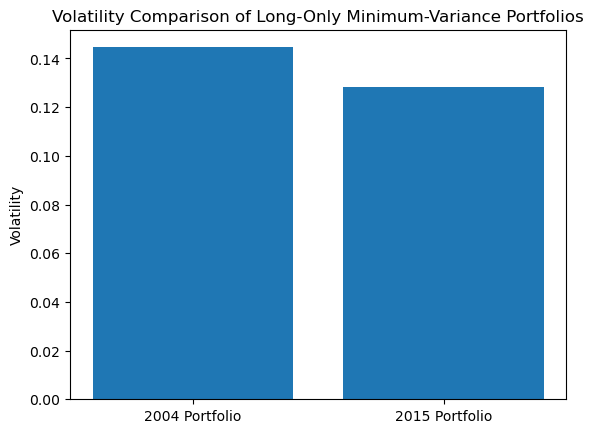

In [45]:
# Mean returns for each industry (used in optimization)
mean_returns_2006_2015 = sample_2006.iloc[:,1:].mean()
mean_returns_1995_2004 = seed_data.iloc[:,1:].mean()

# Calculate the portfolio return based on the weights
def portfolio_return(weights, mean_returns):
    return np.dot(weights, mean_returns)

# Get the returns for the period Jan 2016 - Jul 2023
df_2016_2023 = first_table_data[(first_table_data['Date'] >= 201601) & (first_table_data['Date'] <= 202307)]
Cov_2016_2023 = df_2016_2023.iloc[:,1:].cov()

# Calculate portfolio returns for both optimized portfolios (weights from 2004 and 2015)
port_return_2004 = portfolio_return(min_weights_constrained, mean_returns_1995_2004)
port_return_2015 = portfolio_return(weights_constrained_2006, mean_returns_2006_2015)

# Calculate the portfolio volatility (standard deviation)
volatility_2004 = annualized_volatility(Cov_2016_2023, min_weights_constrained)
volatility_2015 = annualized_volatility(Cov_2016_2023, weights_constrained_2006)

print(f"Volatility of the portfolio optimized in 2004: {round(volatility_2004*100,5)}%")
print(f"Volatility of the portfolio optimized in 2015: {round(volatility_2015*100, 5)}%")
print("\n")

# Plot the volatility comparison
plt.bar(["2004 Portfolio", "2015 Portfolio"], [volatility_2004, volatility_2015])
plt.title("Volatility Comparison of Long-Only Minimum-Variance Portfolios")
plt.ylabel("Volatility")
plt.show()

# **Q3) E.**

**E) i. Importing MSCI data from file as provided and filtering between the time frame January 2005 - July 2023**

In [46]:
# From this only want to read the sheet name MSCI - factor totret Index
data_all_MSCI = pd.read_excel('class project data (FF MSCI) (July 2023).xlsx', sheet_name='MSCI - factor totret index', skiprows=6, header=0)

# Identify the end of the first table (first blank row)
first_table_end = data_all_MSCI[data_all_MSCI.isnull().all(axis=1)].index[0]

# Slice the DataFrame to get only the first table
MSCI_index = data_all_MSCI.iloc[:first_table_end]


# Convert dtype of Date within the table
MSCI_index['Date'] = pd.to_datetime(MSCI_index['Date'], format='%b %d, %Y')
MSCI_index['Date_int'] = pd.to_datetime(MSCI_index['Date'], format='%b %d, %Y')
MSCI_index['Date_int'] = MSCI_index['Date_int'].dt.strftime('%Y%m')
MSCI_index['Date_int'] = MSCI_index['Date_int'].astype(int)

# Get data from January 2005 to July 2023
MSCI_index = MSCI_index[(MSCI_index['Date_int'] >= 200501) & (MSCI_index['Date_int'] <= 202307)]
MSCI_index.reset_index(drop=True, inplace=True)
import warnings
warnings.filterwarnings('ignore')
MSCI_index["USA Standard (Large+Mid Cap)"] = MSCI_index["USA Standard (Large+Mid Cap)"].str.replace(',', '').astype(float)
MSCI_index.head()

,Date,USA Standard (Large+Mid Cap),USA VALUE Standard (Large+Mid Cap),USA MINIMUM VOLATILITY (USD) Standard (Large+Mid Cap),USA EQUAL WEIGHTED Standard (Large+Mid Cap),USA MOMENTUM Standard (Large+Mid Cap),Date_int
0,2005-01-31,3603.494,"5,305.839","1,143.324","1,447.138",620.406,200501
1,2005-02-28,3678.646,"5,467.768","1,167.595","1,479.717",657.693,200502
2,2005-03-31,3619.894,"5,381.221","1,156.098","1,462.321",651.288,200503
3,2005-04-29,3554.490,"5,301.270","1,157.470","1,422.301",625.906,200504
4,2005-05-31,3670.690,"5,407.878","1,182.868","1,483.350",650.030,200505


**E) ii. Plotting the cumulative returns of MSCI Index and Long-only Minimum Variance Portfolio**

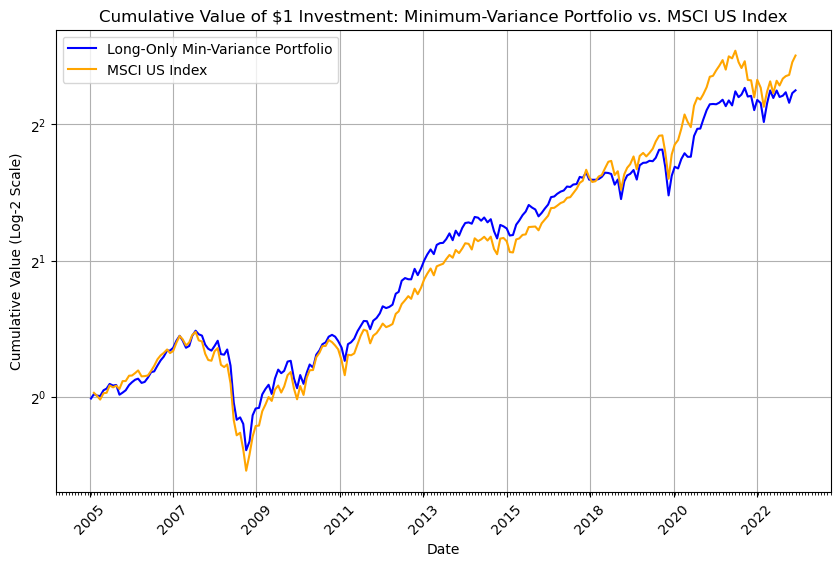

In [47]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Long-only minimum variance portfolio construucted on 31st December 2004 and
# used for January 2005 - July 2023 cumulative returns
portfolio_returns = np.dot(out_sample.iloc[:, 1:], min_weights_constrained)
cumulative_portfolio_value = (1 + portfolio_returns).cumprod()

# Now find MSCI monthly returns
MSCI_monthly_returns = MSCI_index['USA Standard (Large+Mid Cap)'].pct_change()
cumulative_MSCI_value = (1 + MSCI_monthly_returns).cumprod()

# Plot only the years and not year and month and reduce x axis ticks
plt.figure(figsize=(10, 6))
plt.plot(MSCI_index['Date'], cumulative_portfolio_value, label="Long-Only Min-Variance Portfolio", color="blue")
plt.plot(MSCI_index['Date'], cumulative_MSCI_value, label="MSCI US Index", color="orange")

# Customize x-axis to show year only, and set tick frequency to yearly
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # Format as YYYY

# Optionally set minor ticks for months if you want
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

# Explicitly set x-axis tick locations to show all years
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))

# Rotate date labels for readability
plt.xticks(rotation=45)

# Plot the Graph
plt.yscale('log', base=2)
plt.xlabel("Date")
plt.ylabel("Cumulative Value (Log-2 Scale)")
plt.title("Cumulative Value of $1 Investment: Minimum-Variance Portfolio vs. MSCI US Index")
plt.legend()
plt.grid(True)
plt.show()


**E) iii. Finding the top 10 industries in both the crisis**

In [48]:

# Global Financial Crisis:
GFC_start = 200809
GFC_end = 200902
# Covid Meltdown
COVID_start = 202002
COVID_end = 202003

# Filter data for the two crises
GFC_data = out_sample[(out_sample["Date"]>=GFC_start) & (out_sample["Date"]<=GFC_end)]
COVID_data = out_sample[(out_sample["Date"]>=COVID_start) & (out_sample["Date"]<=COVID_end)]

cumulative_returns_GFC = (1 + GFC_data.iloc[:,1:]).cumprod() - 1
cumulative_returns_COVID = (1 + COVID_data.iloc[:,1:]).cumprod() - 1

cumulative_return_end_GFC = cumulative_returns_GFC.iloc[-1]
cumulative_return_end_COVID = cumulative_returns_COVID.iloc[-1]

top_10_GFC = cumulative_return_end_GFC.sort_values(ascending=False).head(10)
top_10_COVID = cumulative_return_end_COVID.sort_values(ascending=False).head(10)

print("Top 10 industries during the 2008 Financial Crisis:")
print(top_10_GFC)

print("\nTop 10 industries during the COVID-19 Market Crisis:")
print(top_10_COVID)



Top 10 industries during the 2008 Financial Crisis:
Gold    -0.116976
Beer    -0.217268
Drugs   -0.232648
PerSv   -0.240713
Food    -0.248909
Meals   -0.260257
Soda    -0.294691
Smoke   -0.299143
Rtail   -0.300527
Util    -0.327138
Name: 991, dtype: float64

Top 10 industries during the COVID-19 Market Crisis:
Gold    -0.031706
Drugs   -0.070460
Rtail   -0.102399
Smoke   -0.130164
Food    -0.131457
Softw   -0.145720
Hshld   -0.146390
LabEq   -0.158744
Boxes   -0.162104
Paper   -0.164095
Name: 1124, dtype: float64
